<a href="https://colab.research.google.com/github/Anne340/Real_Estate_Housing_Prediction/blob/main/Real_Estate_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the dataset

## Importing necessary libraries

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# setting the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

## Read the dataset

In [166]:
# Reading the dataset
house = pd.read_csv('house_data.csv')
house.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [167]:
# Getting the shape of the dataset
house.shape

(21613, 20)

In [168]:
# Getting the statistical information on the dataset
house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [169]:
# Getting the information of the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [170]:
# Checking for the unique values
house.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

# Cleaning the dataset

In [171]:
# Checking for null values
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [172]:
# Checking for duplicates
house.duplicated().sum()

3

In [173]:
# Deleting duplicated data
house.drop_duplicates(inplace=True)
house.duplicated().sum()

0

In [174]:
# Dropping unecessary columns
house = house.drop(['id', 'yr_renovated', 'waterfront',	'view'], axis=1)
house.tail()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
21608          3      8        1530              0      2009    98103   
21609          3      8        2310              0      2014    98146   
21610          3      7        1020              0      2009    98144   
21611          3      8        1600              0      2004    98027   
21612          3      7        1020              0      2008    98144   

           lat     long  sqft_living15  sqft_lot15  
21608  47.6993 -122.346           1530        1509  
21609  47.5107 -122.362           1830        7200  
21610  47.5944 -122.299           1020        2007  
21611  47.5345 -122.069           1410        1287  
21612  47.5941 -122.299           1020        1357

In [175]:
col_names = list(house)
col_names

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

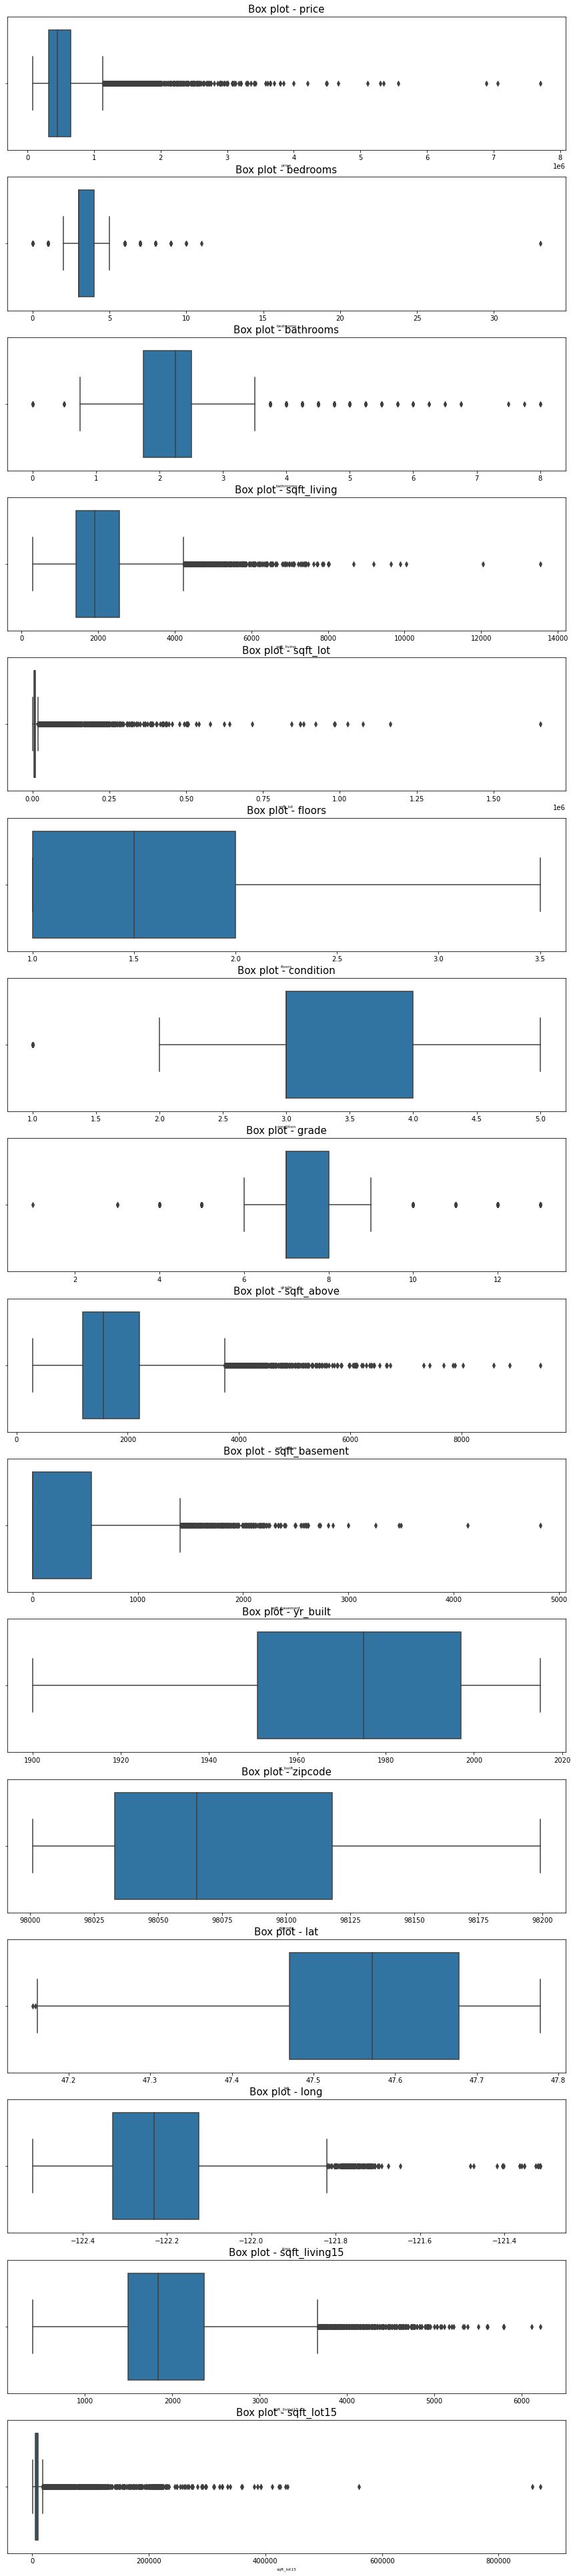

In [176]:
# Checking for outliers
col_names = list(house)

fig, ax = plt.subplots(len(col_names), figsize=(15, 70))

for i, col_val in enumerate(col_names):
    sns.boxplot(house[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=15)
    ax[i].set_xlabel(col_val, fontsize=6)
plt.show()

In [177]:
# Dealing with outliers

Q1 = house[col_names].quantile(0.25)
Q3 = house[col_names].quantile(0.75)
IQR = Q3 - Q1

house = house[~((house[col_names] < (Q1 - 1.5 * IQR)) |(house[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [178]:
house.shape

(16463, 16)

# Univariate Analysis

In [179]:
house.head(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   

   grade  sqft_above  sqft_basement  yr_built  zipcode      lat     long  \
0      7        1180              0      1955    98178  47.5112 -122.257   
1      7        2170            400      1951    98125  47.7210 -122.319   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639

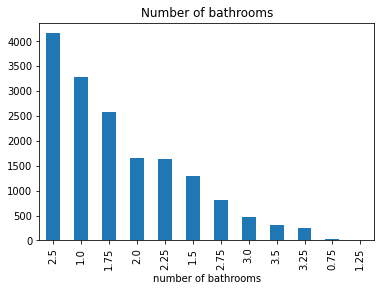

In [181]:
#Histogram showing number of bathrooms
house.bathrooms.value_counts().plot.bar(title = "Number of bathrooms")
plt.xlabel('number of bathrooms')
plt.show()

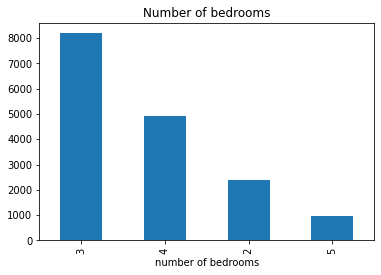

In [182]:
#Histogram showing number of bedrooms
house.bedrooms.value_counts().plot.bar(title = "Number of bedrooms")
plt.xlabel('number of bedrooms')
plt.show()

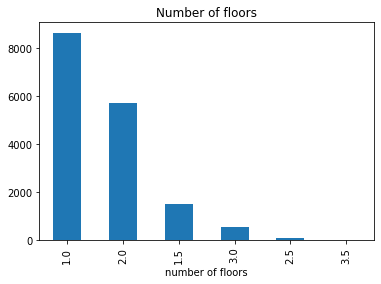

In [183]:
#Histogram showing number of floors
house.floors.value_counts().plot.bar(title = "Number of floors")
plt.xlabel('number of floors')
plt.show()

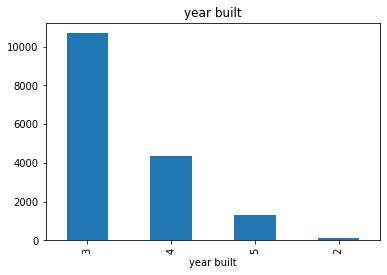

In [184]:
#Histogram showing the condition of the house
house.condition.value_counts().plot.bar(title = "condition of the house")
plt.xlabel('condition of the house')
plt.show()

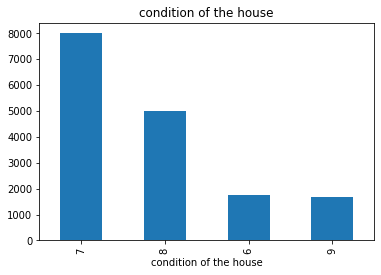

In [185]:
#Histogram showing the grade of the house
house.grade.value_counts().plot.bar(title = "grade of the house")
plt.xlabel('grade of the house')
plt.show()
	

# Bivariate Analysis

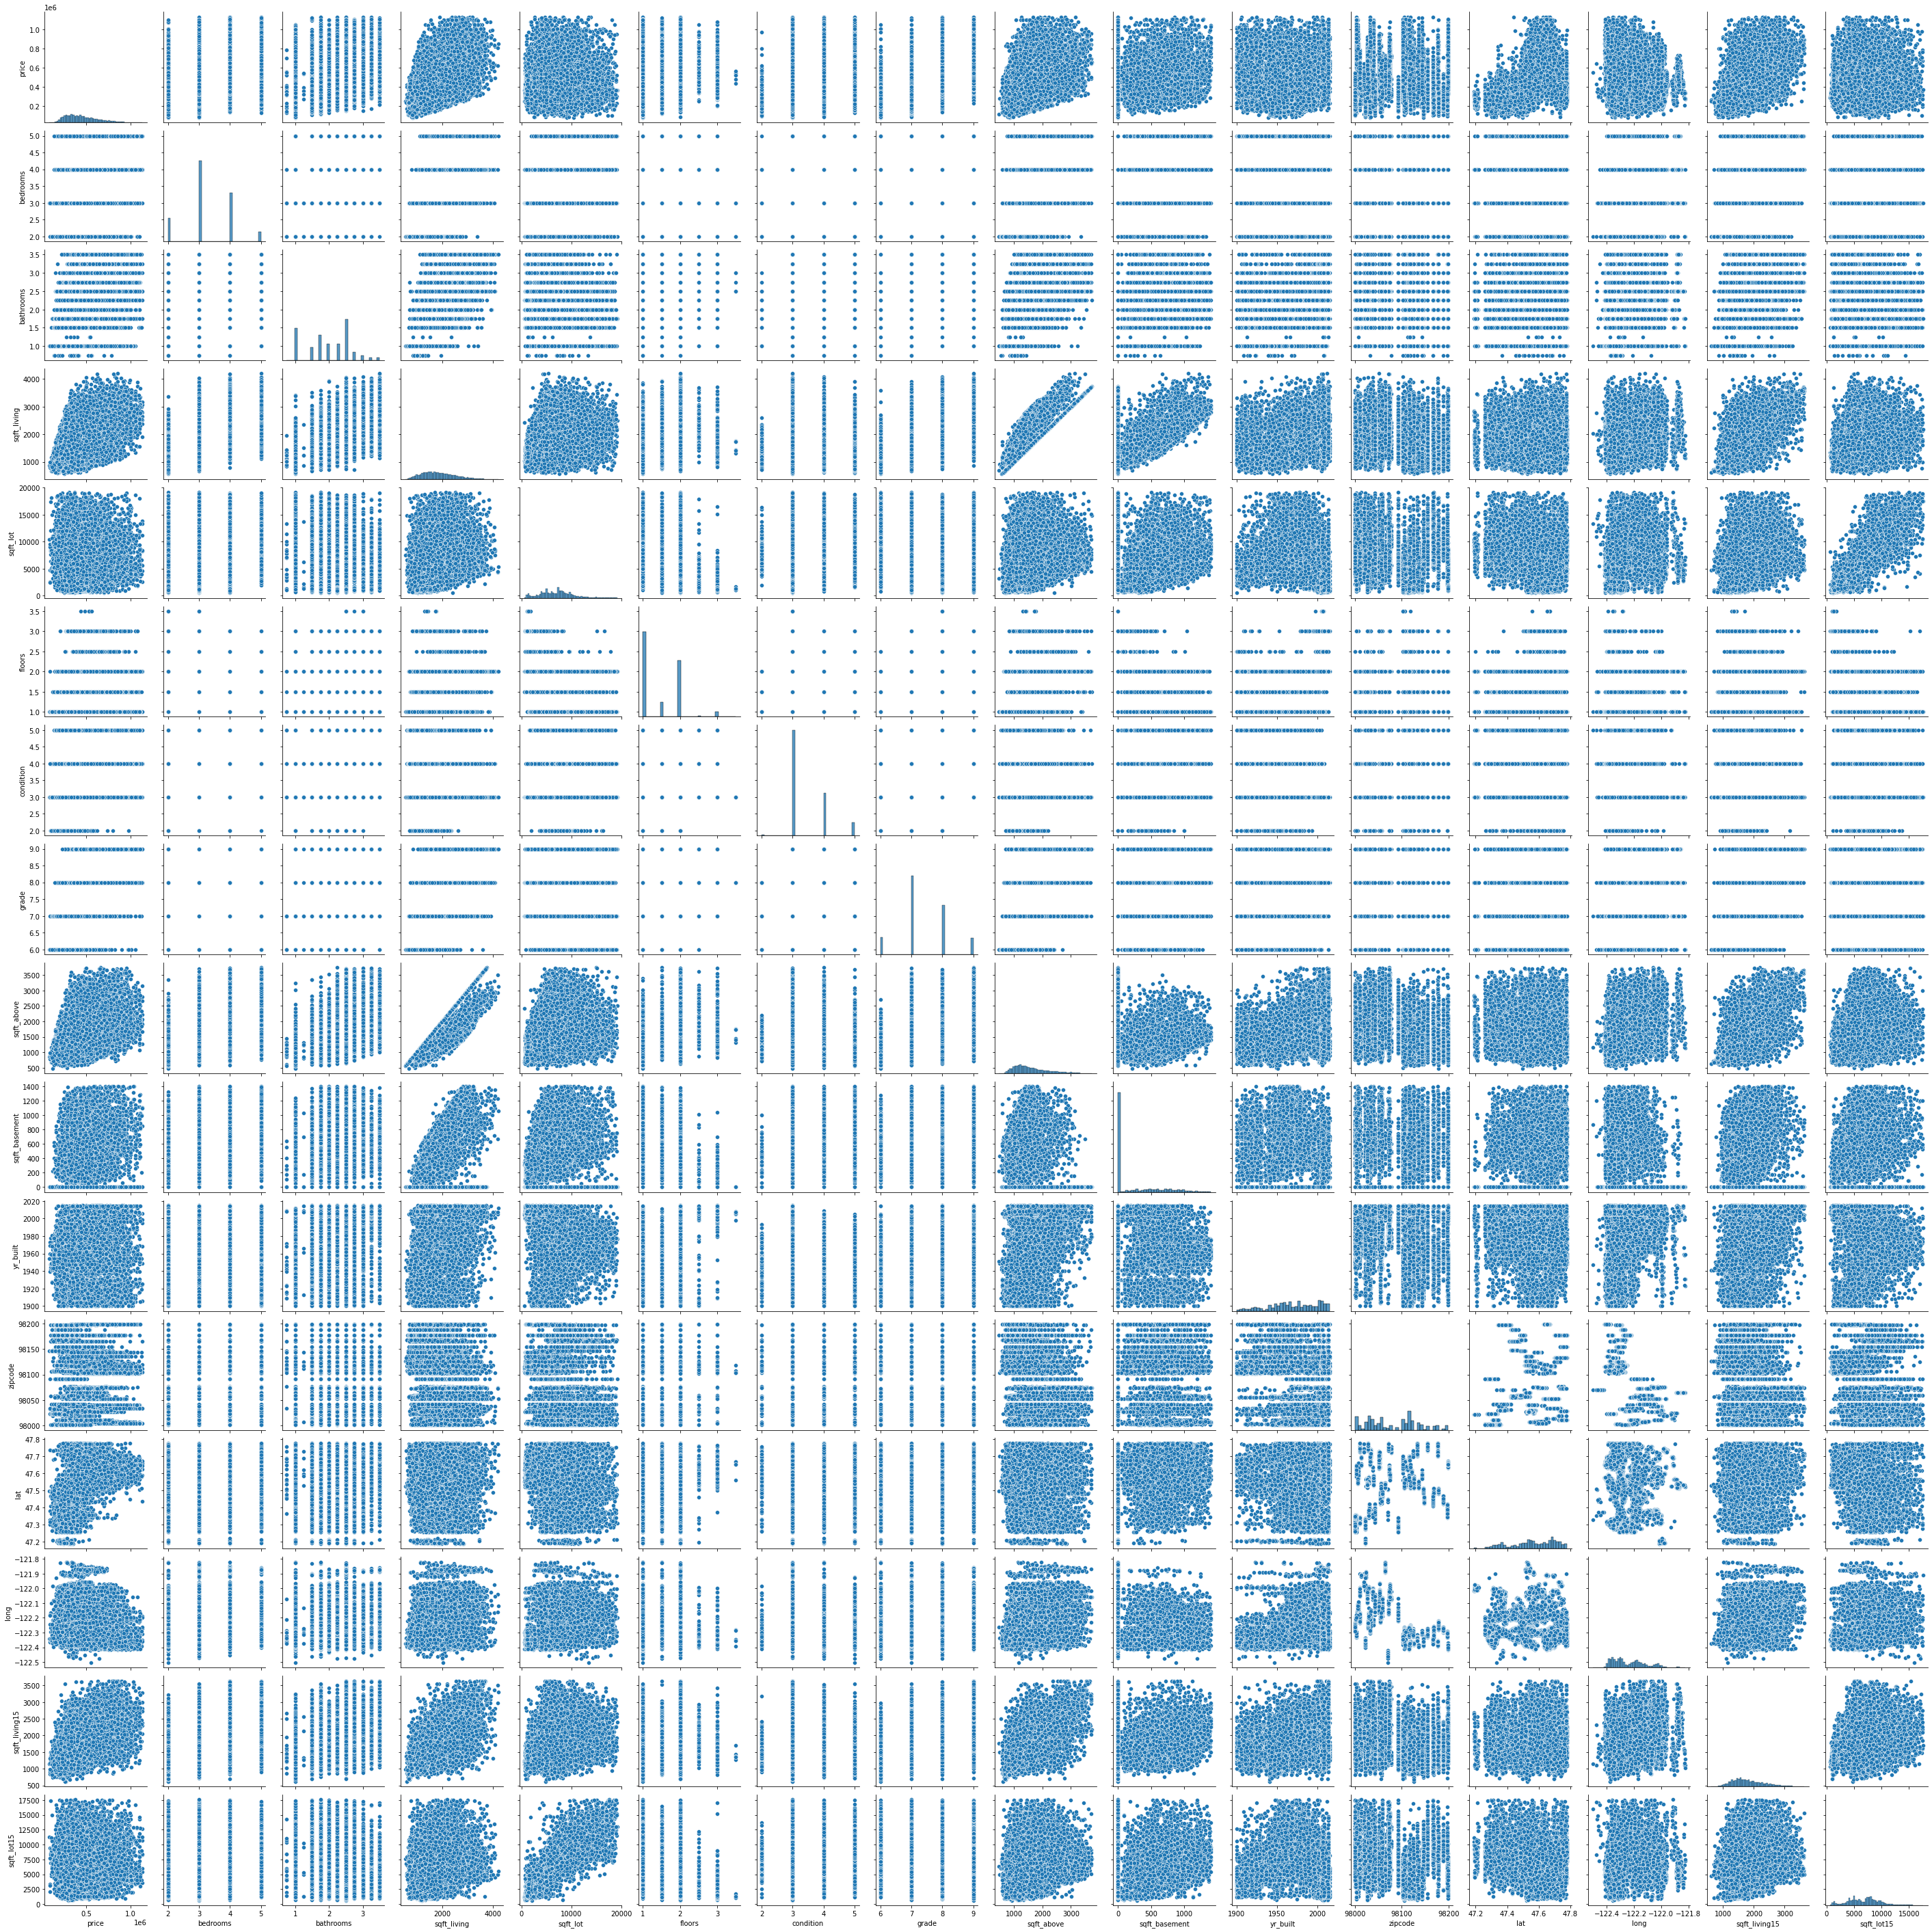

In [186]:
# Plotting pairplots to visualize the data
sns.pairplot(house)

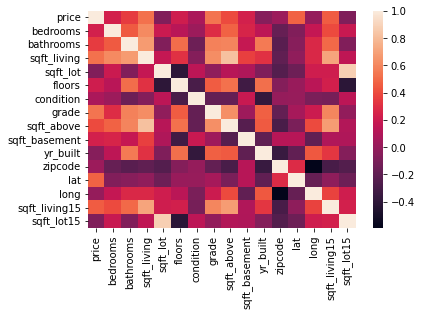

In [188]:
# Plotting a heatmap matrix to show correlation of the data
correlation = house.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)